In [ ]:
#Installing Kaggle to load API/JSON file and download the dataset
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
#Load dependencies


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
#Verify file names
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2486.jpg', 'with_mask_1354.jpg', 'with_mask_69.jpg', 'with_mask_601.jpg', 'with_mask_831.jpg']
['with_mask_3289.jpg', 'with_mask_1268.jpg', 'with_mask_3695.jpg', 'with_mask_3364.jpg', 'with_mask_2881.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2715.jpg', 'without_mask_305.jpg', 'without_mask_750.jpg', 'without_mask_2529.jpg', 'without_mask_1670.jpg']
['without_mask_1048.jpg', 'without_mask_951.jpg', 'without_mask_2344.jpg', 'without_mask_1649.jpg', 'without_mask_720.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
#Creating Labels for the two class of Images#

#with mask --> 1#

#without mask --> 0#

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
#display the images

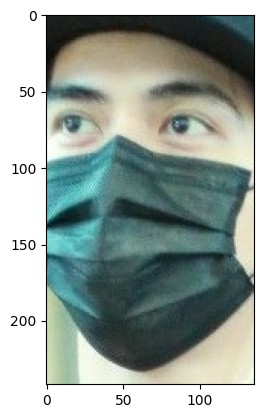

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1354.jpg')
imgplot = plt.imshow(img)
plt.show()

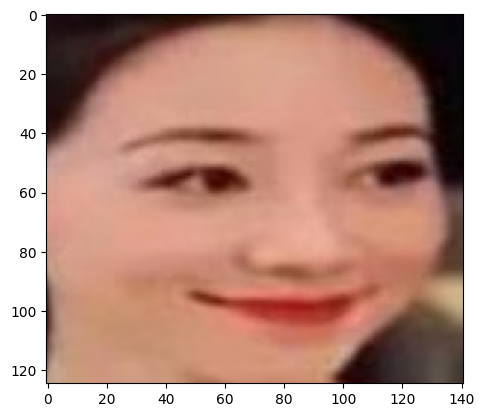

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_354.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Use image processing to resize the images and convert images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 89,  94,  98],
        [ 91,  96, 100],
        [ 90,  94,  98],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       [[101, 106, 110],
        [103, 108, 112],
        [102, 106, 110],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       [[109, 114, 117],
        [111, 116, 119],
        [110, 114, 117],
        ...,
        [ 49,  46,  57],
        [ 49,  46,  57],
        [ 49,  46,  57]],

       ...,

       [[  2,  75, 114],
        [  1,  74, 112],
        [  1,  75, 109],
        ...,
        [184, 200, 213],
        [177, 196, 210],
        [169, 189, 204]],

       [[  5,  68, 105],
        [  5,  69, 103],
        [  5,  68, 101],
        ...,
        [185, 200, 212],
        [177, 192, 204],
        [170, 186, 197]],

       [[ 17,  68, 102],
        [ 16,  68, 101],
        [ 16,  68,  98],
        ...,
        [174, 189, 201],
        [169, 183, 194],
        [166, 180, 189]]], dtype=uint8)
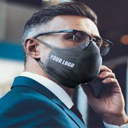

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
#Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 46,  36,  27],
        [ 46,  36,  27],
        [ 46,  36,  27],
        ...,
        [ 40,  35,  29],
        [ 42,  37,  32],
        [ 42,  37,  33]],

       [[ 46,  36,  27],
        [ 46,  36,  27],
        [ 45,  35,  26],
        ...,
        [ 37,  32,  26],
        [ 40,  35,  30],
        [ 40,  36,  32]],

       [[ 44,  34,  25],
        [ 44,  34,  25],
        [ 42,  33,  24],
        ...,
        [ 39,  32,  26],
        [ 40,  33,  29],
        [ 40,  33,  30]],

       ...,

       [[146, 103,  76],
        [149, 106,  79],
        [153, 112,  84],
        ...,
        [ 59,  50,  41],
        [ 63,  54,  43],
        [ 64,  56,  45]],

       [[144, 104,  75],
        [148, 107,  79],
        [154, 113,  85],
        ...,
        [ 59,  50,  41],
        [ 62,  54,  43],
        [ 63,  55,  44]],

       [[143, 104,  73],
        [147, 108,  77],
        [153, 114,  83],
        ...,
        [ 60,  52,  41],
        [ 62,  54,  43],
        [ 62,  54,  43]]], dtype=uint8)
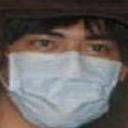

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.18039216, 0.14117647, 0.10588235],
        [0.18039216, 0.14117647, 0.10588235],
        [0.18039216, 0.14117647, 0.10588235],
        ...,
        [0.15686275, 0.1372549 , 0.11372549],
        [0.16470588, 0.14509804, 0.1254902 ],
        [0.16470588, 0.14509804, 0.12941176]],

       [[0.18039216, 0.14117647, 0.10588235],
        [0.18039216, 0.14117647, 0.10588235],
        [0.17647059, 0.1372549 , 0.10196078],
        ...,
        [0.14509804, 0.1254902 , 0.10196078],
        [0.15686275, 0.1372549 , 0.11764706],
        [0.15686275, 0.14117647, 0.1254902 ]],

       [[0.17254902, 0.13333333, 0.09803922],
        [0.17254902, 0.13333333, 0.09803922],
        [0.16470588, 0.12941176, 0.09411765],
        ...,
        [0.15294118, 0.1254902 , 0.10196078],
        [0.15686275, 0.12941176, 0.11372549],
        [0.15686275, 0.12941176, 0.11764706]],

       ...,

       [[0.57254902, 0.40392157, 0.29803922],
        [0.58431373, 0.41568627, 0.30980392],
        [0.6       , 0

In [ ]:
#Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training our neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 143s 827ms/step - loss: 0.4565 - acc: 0.8065 - val_loss: 0.2287 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 138s 814ms/step - loss: 0.3010 - acc: 0.8843 - val_loss: 0.2336 - val_acc: 0.9207
Epoch 3/5
170/170 [==============================] - 133s 784ms/step - loss: 0.2355 - acc: 0.9121 - val_loss: 0.2064 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 142s 837ms/step - loss: 0.1980 - acc: 0.9220 - val_loss: 0.1843 - val_acc: 0.9355
Epoch 5/5
170/170 [==============================] - 131s 771ms/step - loss: 0.1788 - acc: 0.9347 - val_loss: 0.2334 - val_acc: 0.9124


In [ ]:
#Evaluating our model

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 198ms/step - loss: 0.2816 - acc: 0.9007
Test Accuracy = 0.9007279872894287


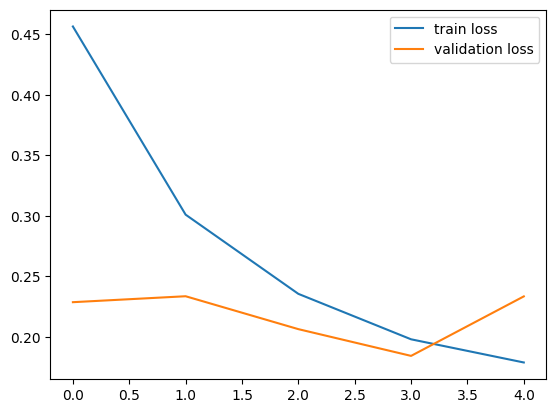

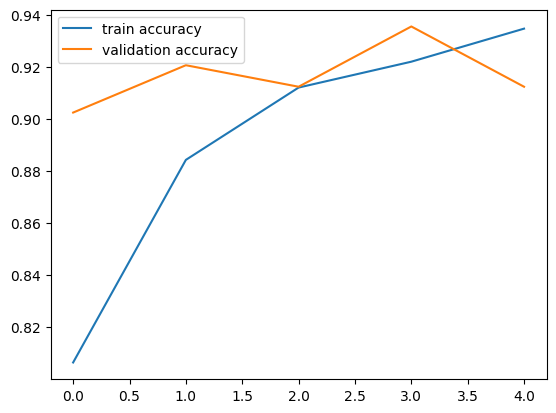

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
#Testing our predictions

Path of the image to be predicted: /content/data/with_mask/with_mask_1354.jpg


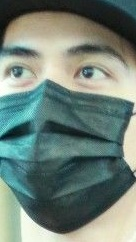

1/1 [==============================] - 0s 32ms/step
[[0.8516464 0.0411257]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1354.jpg


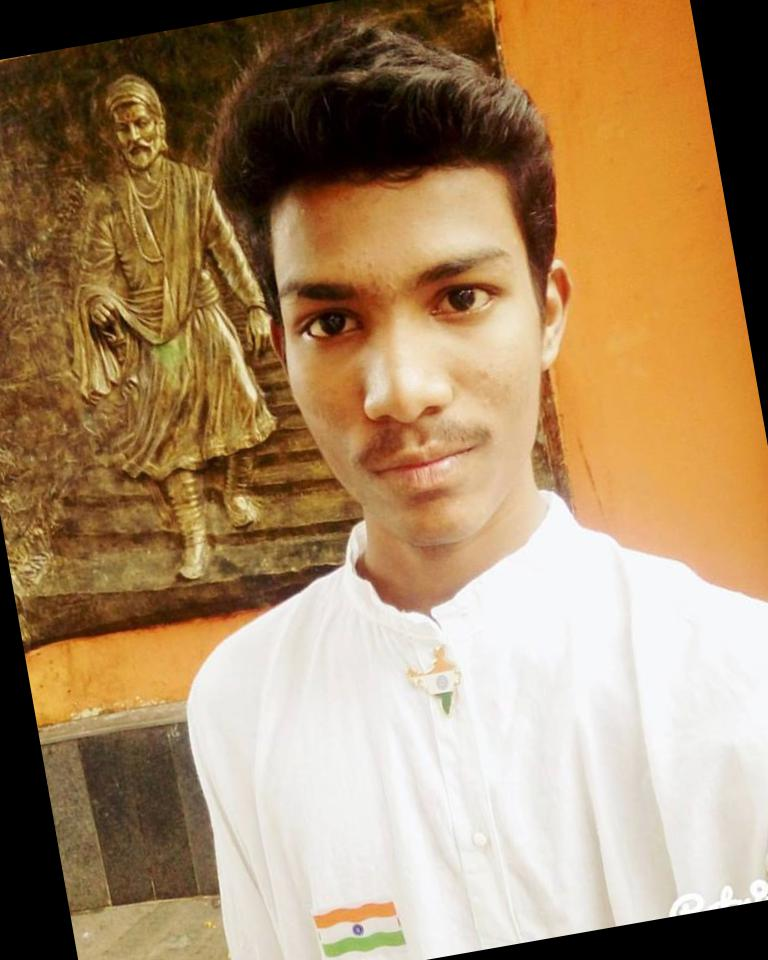

1/1 [==============================] - 0s 52ms/step
[[0.4755757 0.532472 ]]
1
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
# Complex Model # 2 - Keras/Pretrained Transfer Model Learning using Mobilenet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Load MobileNet with weights pre-trained on ImageNet, exclude top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False


In [ ]:
# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),  # Fully connected layer with 1024 units and ReLU activation
    Dense(2, activation='softmax')   # Output layer for two classes with softmax activation
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load and apply preprocessing to datasets
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/data', target_size=(128, 128), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/data', target_size=(128, 128), batch_size=32, class_mode='categorical')


Found 7563 images belonging to 2 classes.
Found 7563 images belonging to 2 classes.


In [ ]:
# Train the model and save the history
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=3, validation_data=validation_generator, validation_steps=len(validation_generator))


Epoch 1/3
 63/237 [======>.......................] - ETA: 15:18 - loss: 0.1490 - accuracy: 0.9489

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 [==============================] - 1182s 5s/step - loss: 0.0713 - accuracy: 0.9761 - val_loss: 0.0124 - val_accuracy: 0.9960
Epoch 2/3
237/237 [==============================] - 274s 1s/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0183 - val_accuracy: 0.9930
Epoch 3/3
237/237 [==============================] - 290s 1s/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0070 - val_accuracy: 0.9980


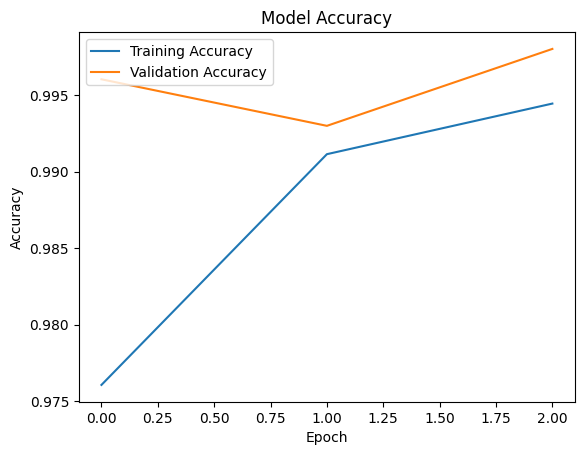

In [20]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Testing the above model

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
#Loading the image
image_path = '/content/drive/MyDrive/data/with_mask/with_mask_1.jpg'
img = image.load_img(image_path, target_size=(128, 128))

In [26]:
# Convert the image to a numpy array and scale it
img_array = image.img_to_array(img) / 255.0

In [27]:
# Expand dimensions to make it compatible with the model input
img_array = np.expand_dims(img_array, axis=0)

In [29]:
#Prediction output
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
if predicted_class[0] == 0:
    print("The model predicts: Class 0") #with mask
else:
    print("The model predicts: Class 1") #without mask

1/1 [==============================] - 0s 103ms/step
The model predicts: Class 0


In [30]:
#Trying a simple method - simple sequential model using MNIST

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define a simple Sequential model for binary classification
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Assuming 28x28 input size
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: -45531.2461 - accuracy: 0.1140 - val_loss: -132948.7656 - val_accuracy: 0.1060
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: -292487.2188 - accuracy: 0.1140 - val_loss: -479167.3125 - val_accuracy: 0.1060
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: -723545.8750 - accuracy: 0.1140 - val_loss: -983868.5625 - val_accuracy: 0.1060
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: -1301845.6250 - accuracy: 0.1140 - val_loss: -1626400.1250 - val_accuracy: 0.1060
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: -2015257.6250 - accuracy: 0.1140 - val_loss: -2401020.0000 - val_accuracy: 0.1060
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: -2856782.7500 - accuracy: 0.1140 - val_loss: -3299980.7500 - val_accuracy: 0.1060
Epoch 7/10
1500/1500 [==============================] - 6s 

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 0.2851 - accuracy: 0.9185 - val_loss: 0.1492 - val_accuracy: 0.9573
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1280 - accuracy: 0.9623 - val_loss: 0.1200 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.1028 - val_accuracy: 0.9693
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0879 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0898 - val_accuracy

In [45]:
#Testing our model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image for binary classification
img_path = '/content/drive/MyDrive/data/with_mask/with_mask_100.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch

# Predict
prediction = model.predict(img_array)
predicted_class = (prediction > 0.5).astype(int)  # Since we're using sigmoid
print(f"The model predicts: {predicted_class[0][0]}")


1/1 [==============================] - 0s 20ms/step
The model predicts: 1


In [46]:
#Simple method 2 - Using SVM

In [71]:
from skimage import feature, io
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os
from PIL import Image

In [72]:
# Linking datasets
mask_path = '/content/drive/MyDrive/data/with_mask'
no_mask_path = '/content/drive/MyDrive/data/without_mask'

images = []
labels = []


In [73]:
# Function to load images from a directory and assign labels
def load_images_from_directory(directory, label):
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path).convert('RGB')  # Convert to RGB
        img = img.resize((128, 128))  # Resize images
        images.append(np.array(img))
        labels.append(label)


In [75]:
# Load 'without mask' images
load_images_from_directory(no_mask_path, 0)  # 0 for 'without mask'


In [78]:
#Load images with masks (modified code to exclude other formats)
def load_images_from_directory(directory, label):
    for img_name in os.listdir(directory):
        if img_name.lower().endswith('.jpg'):  # Check if the file is a .jpg image
            img_path = os.path.join(directory, img_name)
            img = Image.open(img_path).convert('RGB')  # Convert to RGB
            img = img.resize((128, 128))  # Resize images
            images.append(np.array(img))
            labels.append(label)


In [79]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [80]:
# Extract HOG features
hog_features = [feature.hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True) for image in images]
hog_features = np.array(hog_features)


<ipython-input-80-077d908040ed>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = [feature.hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False, multichannel=True) for image in images]


In [81]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


In [82]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
# Train SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [84]:
# Predict
y_pred = clf.predict(X_test_scaled)


In [85]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8387953941541186
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       766
           1       0.86      0.91      0.88      1492

    accuracy                           0.84      2258
   macro avg       0.83      0.81      0.81      2258
weighted avg       0.84      0.84      0.84      2258

